# Lab_5
## Вариант задания: Регрессия на 7 факторах. Эффект мультиколлинеарности создают две пары факторов. Разброса в масштабах факторов нет

#### 1. В соответствии с вариантом задания сгенерировать экспериментальные данные, в которых в явном виде присутствует эффект мультиколлинеарности.
#### 2. Рассчитать ряд показателей, характеризующих эффект мультиколлинеарности. Определить факторы, ответственные за возникновение эффекта мультиколлинеарности.
#### 3. Построить ридж-оценки параметров при различных значениях параметра регуляризации. Выбрать оптимальное значение параметра регуляризации. Построить графики изменения квадрата евклидовой нормы оценок параметров и остаточной суммы квадратов от параметра регуляризации.
#### 4. Провести оценивание модели регрессии по методу главных компонентов. Перейти к описанию в исходном пространстве факторов. Сравнить решение с ридж-оцениванием по смещению оценок и точности предсказания отклика. 

## 1. В соответствии с вариантом задания сгенерировать экспериментальные данные, в которых в явном виде присутствует эффект мультиколлинеарности.

#### Регрессия на 7 факторах. Эффект мультиколлинеарности создают две пары факторов. Разброса в масштабах факторов нет;

In [27]:
# teta_i = 1 для каждого регрессора
import matplotlib.pyplot as plt
import numpy as np
import random as rnd

countN = 1000

def getEta(X):
    u = np.empty(countN)
    for i in range(countN):
        u[i] = np.sum(X[i, :])
    return u
    
# Генерация плана эксперимента
def getX():
    x1 = np.empty(countN)
    x3 = np.empty(countN)
    x5 = np.empty(countN)
    x6 = np.empty(countN)
    x7 = np.empty(countN)
    for i in range(countN):
        x1[i] = (rnd.random() - 0.5) * 4
        x3[i] = (rnd.random() - 0.5) * 4
        x5[i] = (rnd.random() - 0.5) * 4
        x6[i] = (rnd.random() - 0.5) * 4
        x7[i] = (rnd.random() - 0.5) * 4
    
    X = np.matrix([x1, x3 * 0.87 + 0.75 * x1 + 0.99, x3, 0.05 * x6 + x5 * 0.03 - 0.5, x5, x6, x7])

    return np.matrix(X).T

# 2. Рассчитать ряд показателей, характеризующих эффект мультиколлинеарности. Определить факторы, ответственные за возникновение эффекта мультиколлинеарности.

#### 1) Определитель информационной матрицы.

In [28]:
X = getX()
print('Определитель матрицы = %7f' % np.linalg.det(X.T*X))

Определитель матрицы = 1789615.660927


#### 2) Минимальное собственное число матрицы XtX.

In [29]:
eigvalues, eigvectors = np.linalg.eig((X.T).dot(X))
print('Минимальное собственное число =', min(abs(eigvalues)))

Минимальное собственное число = 2.793428724217757e-13


#### 3) Мера обусловленности матрицы по Нейману-Голдстейну.

In [30]:
maxEig = max(eigvalues)
minEig = min(eigvalues)
print('Мера обусловленности по Нейману-Голдстейну =', abs(maxEig/minEig))

Мера обусловленности по Нейману-Голдстейну = 1.404683655228351e+16


#### 4) Максимальная парная сопряженность.

In [39]:
R = np.empty((7, 7))
for i in range(7):
  for j in range(7):
    if i == j: 
      R[i][j] = 1
    else: 
      u, v = np.squeeze(np.asarray(X[i,:])), np.squeeze(np.asarray(X[j,:]))
      R[i][j] = np.dot(u, v) / (np.sum(u**2)**(1/2) * np.sum(v**2)**(1/2))

max_value = -1000
for i in range(7):
    for j in range(i):
        if abs(R[i, j]) > max_value:
            max_value = abs(R[i, j])

R = np.matrix(R)
print("Максимальная парная сопряженность =", max_value)

Максимальная парная сопряженность = 0.8472753354657988


#### 5) Максимальная сопряженность.

In [40]:
# Фиксируем независимую x1
import math
diag_Rsinv = np.diagonal(np.linalg.inv(R.conjugate()))
Ri_2 = 1 - 1 / diag_Rsinv
Ri_abs = abs(Ri_2**(1/2))
print(max(Ri_abs))

1.000000000000001


## 3. Построить ридж-оценки параметров при различных значениях параметра регуляризации. Выбрать оптимальное значение параметра регуляризации. Построить графики изменения квадрата евклидовой нормы оценок параметров и остаточной суммы квадратов от параметра регуляризации.

##### Для нахождения оптимального параметра регуляризации необходимо построить графики изменения квадрата евклидовой нормы оценок параметров и остаточной суммы квадратов от параметра регуляризации. Параметр 𝝀 будет определятся как некоторый компромисс между неизбежным увеличением остаточной  суммы квадратов и желаемым уменьшением евклидовой нормы оценок параметров.

In [33]:
def getRidjTheta(X, y, lam):
    L = np.diag(lam * np.diag(X.T*X))
    return np.array(np.dot(np.linalg.inv(X.T*X + L) * X.T, y))

def calcRss(X, y, th):
    sup = np.empty(len(y))
    for i in range(len(y)):
        sup[i] = y[i] - (X[i, :] * th.T) 
    return np.sum(sup ** 2)

def getUarray(X):
    u = []
    for i in range(len(X)):
        u.append(np.sum(X[i, :]))
    u = np.array(u)
    return u
    
def getYarray(u, p = 0.05):
    y = np.empty(len(u))
    
    w2 = np.dot(u - u.mean(), u - u.mean()) / (len(u - 1))  
    sig = p * (w2)**0.5
    for i in range(len(u)):
        y[i] = u[i] + np.random.normal(0, sig)
    return y

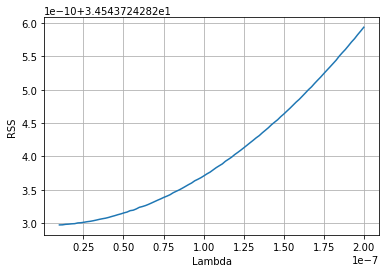

In [34]:
# RSS
Range = 100
lamb = np.linspace(0.00000001, 0.0000002, Range)
y = getYarray(getUarray(X))
ridjTheta = np.array([getRidjTheta(X, y, l_) for l_ in lamb])
RSS_ = [calcRss(X, y, ridjTheta[l_]) for l_ in range(Range)]
Beta_ = [(np.sum(ridjTheta[l_]**2))**(1/2) for l_ in range(Range)]
fig, ax = plt.subplots()
plt.grid()
plt.plot(lamb, RSS_)
ax.set_xlabel('Lambda')
ax.set_ylabel('RSS')
plt.show()

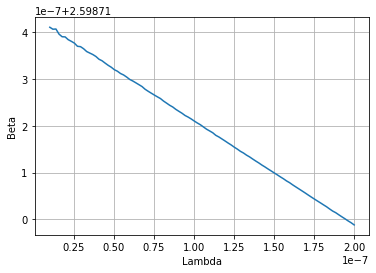

In [35]:
# Beta
fig, ax = plt.subplots()
plt.plot(lamb, Beta_ )
ax.set_xlabel('Lambda')
ax.set_ylabel('Beta')
plt.grid()
plt.show()

In [36]:
# Оптимальное занчение по малому увеличению RSS
lambda_ = 0.00000002

# Различие с идеальной theta
theta_Ridj = getRidjTheta(X, y, lambda_)
print(theta_Ridj)
print("Различие Ридж оценки с идеальной theta по норме = " , np.linalg.norm(theta_Ridj - np.array([1, 1, 1, 1, 1, 1, 1])))

[[1.12566279 0.83614531 1.14559578 0.65863122 1.00835913 1.01383975
  0.99809621]]
Различие Ридж оценки с идеальной theta по норме =  0.42501213096768026


## 4. Провести оценивание модели регрессии по методу главных компонентов. Перейти к описанию в исходном пространстве факторов. Сравнить решение с ридж-оцениванием по смещению оценок и точности предсказания отклика

In [37]:
eps = 0.00000001

y_c = y - np.average(y)
X_c = X.copy()
for i in range(7):
  X_c[:,i] -= np.average(X_c[:,i])

# Найдем собственные значения и собственные векторы
eig_values, eig_vectors = np.linalg.eig(X_c.T*X_c)
eig_important = eig_values / np.sum(eig_values)

# Строим массив для удаления неважных компонент
delete_array = []
for i in range(len(eig_important)):
  if abs(eig_important[i]) < eps:
    delete_array.append(i) 

# Удаляем неважные компоненты
eig_vectors_new = np.delete(eig_vectors, delete_array, 1)
Z = X_c * eig_vectors_new

b = np.dot(np.linalg.inv(Z.T*Z)*Z.T, y_c)
theta_pca = np.squeeze(np.asarray(np.dot(eig_vectors_new, b.T)))
print(theta_pca)
print("Различие оценки по методу главных компонент с идеальной theta по норме = ", np.linalg.norm(theta_pca - np.array([1, 1, 1, 1, 1, 1, 1])))

[0.80076084 1.26934793 0.76870953 0.08290025 1.02563108 1.04262632
 0.99809623]
Различие оценки по методу главных компонент с идеальной theta по норме =  1.0046339438675482


In [38]:
print("Различия между оценками по норме  = ", np.linalg.norm(theta_pca - theta_Ridj))

Различия между оценками по норме  =  0.8762774461488385
